In [1]:
# VISUALIZATION 

In [2]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
table = pd.read_csv('QA-QC-V5.csv')
table['Category'] = table['Category'].str.replace('P','p')
table[table['Category']=='LOST']='unidentified'

table

,Scientist Name,Name of the project,Sample ID,Date FTIR Analysis,Date of QA/QC,FTIR Analyst,QA -1,SMP?,FTIR final,Origin,Category,Group,Material,Location,Date,Shape,Colour,Height,Width
0,Amir Parizi,Combined Sewer Overflow,20191012-01-200-01,2020-01-23,2020-03-23,AP,AP,NO,cellulosic,unknown,cellulosic,cellulosic,cellulosic,Angus CSO,12-Sep-19,Fiber,Pink,128,11
1,Amir Parizi,Combined Sewer Overflow,20191012-02-200-02,2020-01-25,2020-03-21,AP,AP,NO,cellulosic,unknown,cellulosic,cellulosic,cellulosic,Angus CSO,12-Sep-19,Fiber,Green,149,8
2,Amir Parizi,Combined Sewer Overflow,20191012-01-200-03,2020-05-02,2020-03-21,AP,AP,NO,cellulosic,unknown,cellulosic,cellulosic,cellulosic,Angus CSO,12-Sep-19,Fiber,Blue,5010,126
3,Amir Parizi,Combined Sewer Overflow,20191012-01-200-04,2020-02-02,2020-03-21,AP,AP,YES,Polypropylene,synthetic,plastic,Polyolefin,Polypropylene,Angus CSO,12-Sep-19,Fiber,Black,1200,54
4,Amir Parizi,Combined Sewer Overflow,20191012-01-200-05,2020-02-02,2020-03-21,AP,AP,YES,polyester,synthetic,plastic,polyester,polyester,Angus CSO,12-Sep-19,Fiber,Black,582,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Amir Parizi,Combined Sewer Overflow,20190710-02-200-30,2020-05-02,2020-03-21,AP,AP,YES,polyester,synthetic,plastic,polyester,polyester,English Bay,10-Jul-19,Fiber,Red,1316,20
117,Amir Parizi,Combined Sewer Overflow,20190710-02-200-31,2020-05-02,2020-03-21,AP,AP,YES,cellulosic,unknown,cellulosic,cellulosic,cellulosic,English Bay,10-Jul-19,Fiber,Black,680,37
118,Amir Parizi,Combined Sewer Overflow,20190710-02-200-32,2020-05-02,2020-03-21,AP,AP,NO,cellulosic,unknown,cellulosic,cellulosic,cellulosic,English Bay,10-Jul-19,Fiber,Black,2156,24
119,Amir Parizi,Combined Sewer Overflow,20190710-02-200-33,2020-05-02,2020-03-21,AP,AP,NO,cellulosic,unknown,cellulosic,cellulosic,cellulosic,English Bay,10-Jul-19,Fiber,Black,1196,15


Text(0, 0.5, 'Number of particles in each Category')

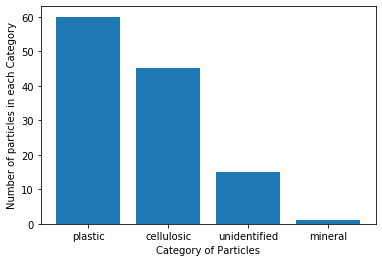

In [3]:
fig,ax=plt.subplots()
category=table['Category'].value_counts()
ax.bar(category.index,category)
plt.xlabel('Category of Particles')
plt.ylabel('Number of particles in each Category')

In [4]:
table['Category'].value_counts()


plastic         60
cellulosic      45
unidentified    15
mineral          1
Name: Category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

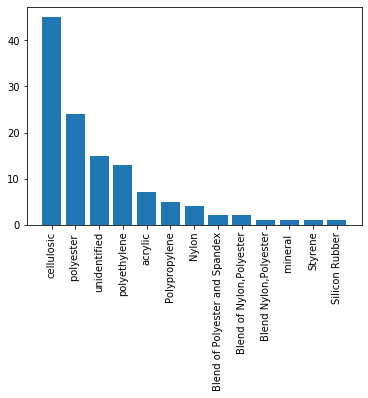

In [5]:
fig,ax=plt.subplots()
FTIR_final=table['FTIR final'].value_counts()
ax.bar(FTIR_final.index,FTIR_final)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

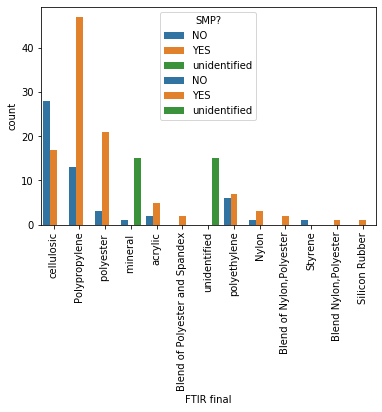

In [6]:
sns.countplot(x='Category',data= table,hue='SMP?');
sns.countplot(x='FTIR final',data= table,hue='SMP?');
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'unidentified'

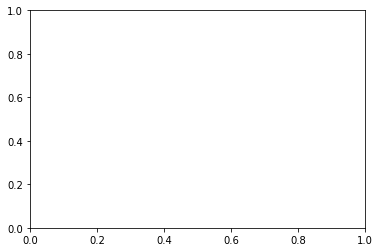

In [7]:
sns.distplot(table['Height'], kde=False,bins=20);

In [ ]:
sns.jointplot(x="Height", y="Category_num", data=table, kind="kde");

In [ ]:
sns.catplot(x="Category", y="Height um", kind="box", data=table);
#long axis would be better!

In [ ]:
sns.catplot(x="Category", y="Height", kind="box", data=table,hue='SMP?');

In [ ]:
sns.countplot(x='FTIR final',data= table,hue='SMP?');
plt.xticks(rotation=90)



In [ ]:
sns.countplot(x='Category',data=table,hue='Colour');
plt.xticks(rotation=90)


In [ ]:
sns.countplot(x='Category',data=table,hue='Shape');
plt.xticks(rotation=90);


In [ ]:
# FRACTIONS AND THEIR ERRORS

In [14]:
def random_plastic(fraction,ran,data,totnum):
    
    for i in range(ran):
        total_num = round(fraction * totnum)
        random_collection=[]
        random_index = random.sample(range(0,totnum),total_num)
        for j in range(total_num):
            random_collection.append(data['Category'][random_index[j]])
        if i == 0:
            random_table=pd.DataFrame(random_collection)
        else:
            random_table[i]=pd.DataFrame(random_collection)
    return random_table
#random_table

In [15]:
def err_plastic(fraction,ran,data):
    pl=[]
    ce=[]
    category=data['Category'].value_counts()
    error_total=pd.DataFrame(columns=['error_pl','error_ce'])
    for i in range(ran):
        random_counts=random_table[i].value_counts()
        if ('cellulosic' in random_counts.index) == False:
            random_counts['cellulosic']=0
        if  ('plastic' in random_counts.index) == False:
            random_counts['plastic']=0
        error_plastic=((random_counts['plastic']/fraction)-category['plastic'])/(category['plastic'])*100
        error_cellulosic=((random_counts['cellulosic']/fraction)-category['cellulosic'])/(category['cellulosic'])*100
        pl.append(error_plastic)
        ce.append(error_cellulosic)
    error_total['error_pl']=pl
    error_total['error_ce']=ce
    return (error_total,random_counts)
#error_total

    
    

In [16]:
random_table=random_plastic(fraction=0.2,ran=100,data=table,totnum=len(table))
(error_total,random_counts)=err_plastic(fraction=0.2,ran=100,data=table)
random_table
error_total

,error_pl,error_ce
0,25.000000,-33.333333
1,-16.666667,-11.111111
2,8.333333,-11.111111
3,-8.333333,22.222222
4,8.333333,0.000000
...,...,...
95,8.333333,-22.222222
96,8.333333,11.111111
97,50.000000,-44.444444
98,0.000000,-11.111111


In [17]:
abs_error_plastic=abs(error_total['error_pl']).mean()
abs_error_cellulosic=abs(error_total['error_ce']).mean()
print(abs_error_plastic)
print(abs_error_cellulosic)

15.333333333333332
19.666666666666643


In [18]:
pla=[]
cel=[]
error_table_total_pl={}
error_table_total_ce={}
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=table,totnum=len(table))
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=table)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    error_table_total_pl[i]=error_total['error_pl']
    error_table_total_ce[i]=error_total['error_ce']
    pla.append(abs_error_plastic)
    cel.append(abs_error_cellulosic)
        
   

In [29]:
error_with_std_plastic=pd.DataFrame(error_table_total_pl).std()/2
error_with_std_plastic

1     18.195842
2     13.713795
3      8.810683
4      8.215817
5      7.837505
6      6.646235
7      6.316429
8      5.566396
9      5.857814
10     5.241101
11     4.220586
12     3.830836
13     2.954146
14     2.995966
15     2.440564
16     2.221112
17     2.335796
18     1.608038
19     1.075820
20     0.000000
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

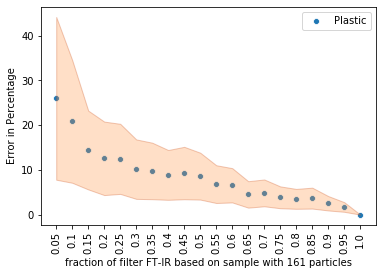

In [44]:
error_with_std_plastic=pd.DataFrame(error_table_total_pl).std()/2
fraction_index=['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1.0']    
sns.scatterplot(y=pla,x=fraction_index)
plt.fill_between(fraction_index, pla-error_with_std_plastic,pla+error_with_std_plastic,alpha=0.3,edgecolor='#CC4F1B',facecolor='#FF9848')
plt.xlabel('fraction of filter FT-IR based on sample with 161 particles')
plt.ylabel('Error in Percentage')
plt.legend(['Plastic'])
plt.xticks(rotation=90)

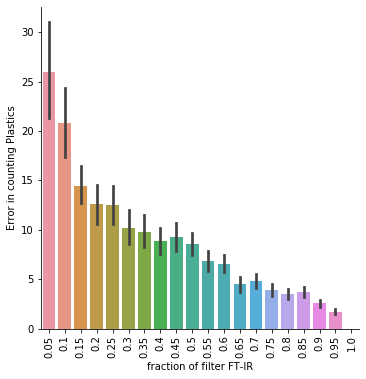

In [48]:
error_with_std_plastic=pd.DataFrame(error_table_total_pl)
error_with_std_plastic.rename(columns={1:'0.05',2:'0.1',3:'0.15',4:'0.2',5:'0.25',6:'0.3',7:'0.35',8:'0.4',9:'0.45',10:'0.5',11:'0.55',12:'0.6',13:'0.65',14:'0.7',15:'0.75',16:'0.8',17:'0.85',18:'0.9',19:'0.95',20:'1.0'},inplace=True)  
sns.catplot(data=abs(error_with_std_plastic),kind='bar')
plt.xlabel('fraction of filter FT-IR')
plt.ylabel('Error in counting Plastics')
plt.xticks(rotation=90)
plt.show()

In [49]:
error_with_std_plastic

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,33.333333,-50.000000,2.222222e+01,8.333333,0.000000,-1.111111e+01,4.761905e+00,4.166667,3.703704,-16.666667,3.030303e+00,1.111111e+01,-5.128205,7.142857e+00,-6.666667,4.166667,-1.960784e+00,0.000000,-1.754386,0.0
1,66.666667,16.666667,1.111111e+01,8.333333,6.666667,5.555556e+00,-1.184238e-14,-8.333333,0.000000,3.333333,-1.184238e-14,5.555556e+00,7.692308,4.761905e+00,-4.444444,-6.250000,-3.921569e+00,1.851852,-1.754386,0.0
2,66.666667,16.666667,-1.111111e+01,8.333333,-26.666667,1.111111e+01,-4.761905e+00,-16.666667,14.814815,10.000000,3.030303e+00,-1.111111e+01,5.128205,1.190476e+01,-6.666667,-4.166667,3.921569e+00,1.851852,-1.754386,0.0
3,0.000000,0.000000,1.111111e+01,0.000000,-13.333333,-1.184238e-14,4.761905e+00,-4.166667,7.407407,-10.000000,9.090909e+00,5.555556e+00,2.564103,9.523810e+00,-2.222222,2.083333,7.843137e+00,1.851852,-3.508772,0.0
4,0.000000,-16.666667,-1.184238e-14,0.000000,20.000000,-5.555556e+00,9.523810e+00,-12.500000,7.407407,-13.333333,6.060606e+00,1.111111e+01,-15.384615,-2.380952e+00,-4.444444,-4.166667,-1.960784e+00,0.000000,-1.754386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,16.666667,-1.111111e+01,0.000000,-13.333333,-1.111111e+01,1.904762e+01,-8.333333,7.407407,-16.666667,6.060606e+00,2.777778e+00,0.000000,-1.184238e-14,2.222222,-2.083333,1.960784e+00,1.851852,1.754386,0.0
96,0.000000,-50.000000,1.111111e+01,-16.666667,13.333333,-1.666667e+01,1.904762e+01,8.333333,0.000000,-20.000000,6.060606e+00,1.111111e+01,-5.128205,-2.380952e+00,0.000000,6.250000,-1.960784e+00,5.555556,-5.263158,0.0
97,0.000000,50.000000,2.222222e+01,-8.333333,20.000000,-5.555556e+00,-1.184238e-14,-12.500000,18.518519,-3.333333,2.424242e+01,2.777778e+00,-2.564103,7.142857e+00,2.222222,2.083333,-1.184238e-14,3.703704,3.508772,0.0
98,-66.666667,-16.666667,2.222222e+01,8.333333,6.666667,-1.184238e-14,-1.904762e+01,20.833333,-11.111111,0.000000,-1.184238e-14,-5.555556e+00,-7.692308,-1.184238e-14,13.333333,8.333333,-3.921569e+00,1.851852,1.754386,0.0


In [56]:
sep12_Ang_table=table[(table['Date']=='12-Sep-19') & (table['Location']=='Angus CSO')]
sep12_Ang_table.reset_index(inplace=True)
jul10_Ang_table=table[(table['Date']=='10-Jul-19') & (table['Location']=='Angus CSO')]
jul10_Ang_table.reset_index(inplace=True)
jul10_Eng_table=table[(table['Date']=='10-Jul-19') & (table['Location']=='English Bay')]
jul10_Eng_table.reset_index(inplace=True)
plasa=[]
celsa=[]
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=sep12_Ang_table,totnum=len(sep12_Ang_table))
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=sep12_Ang_table)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    plasa.append(abs_error_plastic)
    celsa.append(abs_error_cellulosic)
plaja=[]
celja=[]
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=jul10_Ang_table,totnum=len(jul10_Ang_table))
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=jul10_Ang_table)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    plaja.append(abs_error_plastic)
    celja.append(abs_error_cellulosic)
plaje=[]
celje=[]
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=jul10_Eng_table,totnum=len(jul10_Eng_table))
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=jul10_Eng_table)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    plaje.append(abs_error_plastic)
    celje.append(abs_error_cellulosic)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

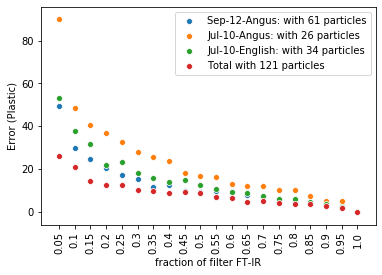

In [57]:
fraction_index=['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1.0']    
sns.scatterplot(y=plasa,x=fraction_index)
sns.scatterplot(y=plaja,x=fraction_index)
sns.scatterplot(y=plaje,x=fraction_index)
sns.scatterplot(y=pla,x=fraction_index)
plt.xlabel('fraction of filter FT-IR')
plt.ylabel('Error (Plastic)')
plt.legend(['Sep-12-Angus: with 61 particles','Jul-10-Angus: with 26 particles','Jul-10-English: with 34 particles','Total with 121 particles'])
plt.xticks(rotation=90)

In [62]:
plaje

[53.26315789473677,
 37.578947368421076,
 31.508771929824505,
 22.05263157894738,
 23.263157894736846,
 18.210526315789494,
 15.984962406015038,
 13.89473684210527,
 14.888888888888882,
 12.315789473684225,
 10.708133971291875,
 9.140350877192974,
 8.688259109311748,
 7.278195488721807,
 6.10526315789474,
 6.052631578947367,
 4.507739938080495,
 3.777777777777776,
 2.0221606648199533,
 0.0]

In [ ]:
# 15% error 

# TOTAL with 161 particle : 0.15    NUM : 0.15*161 = 24.15
# sep12_Ang with 61 particle : 0.3  NUM : 0.3*61   = 18.3
# jul10_Eng with 34 particle : 0.4  NUM : 0.4*34   = 13.6
# jul10_Ang with 26 particle : 0.6  NUM : 0.6*26.  = 15.6


In [93]:
table_smp= table[table['SMP?']== 'YES']
table_smp.reset_index(inplace=True)
table_test= table.sample(n = 74) 
table_test.reset_index(inplace=True)
plasa=[]
celsa=[]
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=table_test,totnum=74)
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=table_test)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    plasa.append(abs_error_plastic)
    celsa.append(abs_error_cellulosic)
plaja=[]
celja=[]
for i in range(1,21):
    random_table=random_plastic(fraction=0.05*i,ran=100,data=table_smp,totnum=74)
    (error_total,random_counts)=err_plastic(fraction=0.05*i,ran=100,data=table_smp)
    abs_error_plastic=abs(error_total['error_pl']).mean()
    abs_error_cellulosic=abs(error_total['error_ce']).mean()
    plaja.append(abs_error_plastic)
    celja.append(abs_error_cellulosic)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

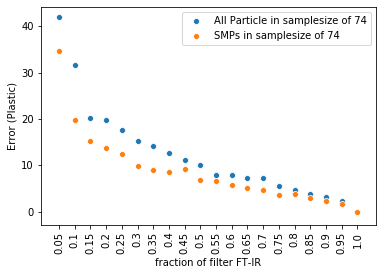

In [98]:
fraction_index=['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1.0']    
sns.scatterplot(y=plasa,x=fraction_index)
sns.scatterplot(y=plaja,x=fraction_index)
plt.xlabel('fraction of filter FT-IR')
plt.ylabel('Error (Plastic)')
plt.legend(['All Particle in samplesize of 74','SMPs in samplesize of 74'])
plt.xticks(rotation=90)